In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("C:/Users/IFC-36/Downloads/IAS.csv")

In [3]:
df

,RowID,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Bihar,NALANDA,2005,Rabi,Wheat,81934.00,160425.00
1,1,Assam,KARBI ANGLONG,2019,Whole Year,Onion,257.00,514.00
2,2,Gujarat,ANAND,2020,Summer,Maize,100.00,100.00
3,3,Karnataka,UTTAR KANNAD,2013,Rabi,Groundnut,2872.00,4572.00
4,4,Uttar Pradesh,JAUNPUR,2016,Rabi,Onion,110.00,1290.00
...,...,...,...,...,...,...,...,...
73822,73822,Bihar,BUXAR,2012,Whole Year,Onion,203.00,1918.00
73823,73823,Madhya Pradesh,RAJGARH,2021,Kharif,Bajra,12.00,11.00
73824,73824,Madhya Pradesh,RAJGARH,2006,Kharif,Groundnut,8700.00,9100.00
73825,73825,Rajasthan,TONK,2008,Kharif,Bajra,34477.00,20137.00


In [4]:
df.head()

,RowID,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Bihar,NALANDA,2005,Rabi,Wheat,81934.0,160425.0
1,1,Assam,KARBI ANGLONG,2019,Whole Year,Onion,257.0,514.0
2,2,Gujarat,ANAND,2020,Summer,Maize,100.0,100.0
3,3,Karnataka,UTTAR KANNAD,2013,Rabi,Groundnut,2872.0,4572.0
4,4,Uttar Pradesh,JAUNPUR,2016,Rabi,Onion,110.0,1290.0


In [5]:
df.tail()

,RowID,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
73822,73822,Bihar,BUXAR,2012,Whole Year,Onion,203.00,1918.00
73823,73823,Madhya Pradesh,RAJGARH,2021,Kharif,Bajra,12.00,11.00
73824,73824,Madhya Pradesh,RAJGARH,2006,Kharif,Groundnut,8700.00,9100.00
73825,73825,Rajasthan,TONK,2008,Kharif,Bajra,34477.00,20137.00
73826,73826,Jharkhand,KODERMA,2010,Winter,Rice,14685.71,18552.95


In [6]:
df.describe()

,RowID,Crop_Year,Area,Production
count,73827.000000,73827.000000,7.382700e+04,7.273100e+04
mean,36913.000000,2013.657551,1.218297e+04,6.210320e+05
std,21312.163499,4.954910,5.348285e+04,1.749756e+07
min,0.000000,2005.000000,4.000000e-02,0.000000e+00
25%,18456.500000,2010.000000,8.100000e+01,8.900000e+01
50%,36913.000000,2014.000000,5.900000e+02,7.290000e+02
75%,55369.500000,2018.000000,4.500000e+03,7.200000e+03
max,73826.000000,2023.000000,8.580100e+06,1.125000e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73827 entries, 0 to 73826
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          73827 non-null  int64  
 1   State_Name     73827 non-null  object 
 2   District_Name  73827 non-null  object 
 3   Crop_Year      73827 non-null  int64  
 4   Season         73827 non-null  object 
 5   Crop           73827 non-null  object 
 6   Area           73827 non-null  float64
 7   Production     72731 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [8]:
df.max()

RowID                     73826
State_Name          West Bengal
District_Name         ZUNHEBOTO
Crop_Year                  2023
Season              Winter     
Crop             other oilseeds
Area                  8580100.0
Production         1125000000.0
dtype: object

In [9]:
df.min()

RowID                                      0
State_Name       Andaman and Nicobar Islands
District_Name             24 PARAGANAS NORTH
Crop_Year                               2005
Season                           Autumn     
Crop                                   Apple
Area                                    0.04
Production                               0.0
dtype: object

In [10]:
df.isnull().sum()

RowID               0
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       1096
dtype: int64

In [11]:
#Finding Columns with Missing Values
df.isna().any()

RowID            False
State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [12]:
x = df['Production'].mean()
print("Mean Production:", x)

Mean Production: 621031.9533575778


In [13]:
df['Production'] = df['Production'].fillna(df['Production'].mean())

In [14]:
df.isnull().sum()

RowID            0
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [15]:
df.columns

Index(['RowID', 'State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area', 'Production'],
      dtype='object')

In [16]:
df.shape

(73827, 8)

In [17]:
df.size

590616

Text(0.5, 0, 'Production')

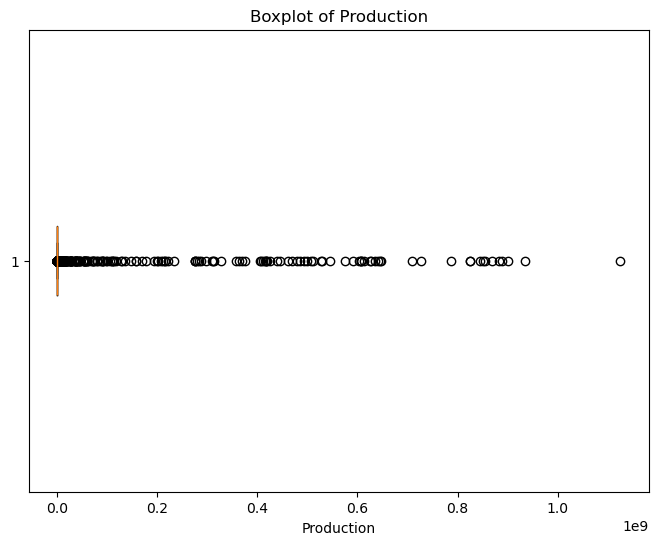

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Production'].dropna(), vert=False)
plt.title('Boxplot of Production')
plt.xlabel('Production')

Text(0.5, 0, 'Area')

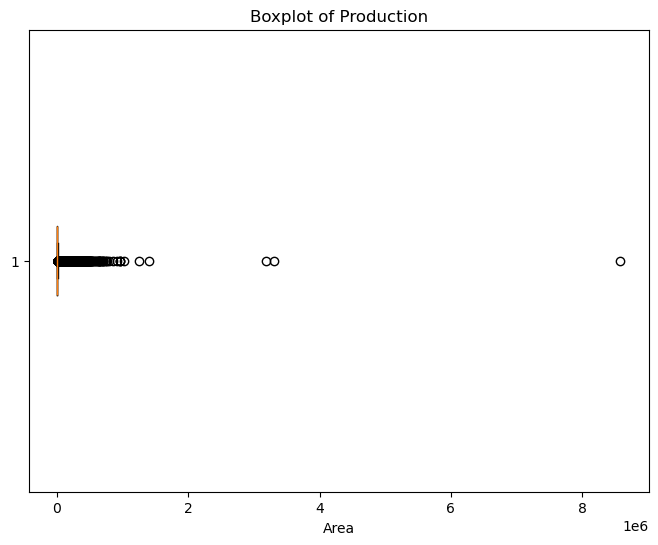

In [19]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Area'].dropna(), vert=False)
plt.title('Boxplot of Production')
plt.xlabel('Area')

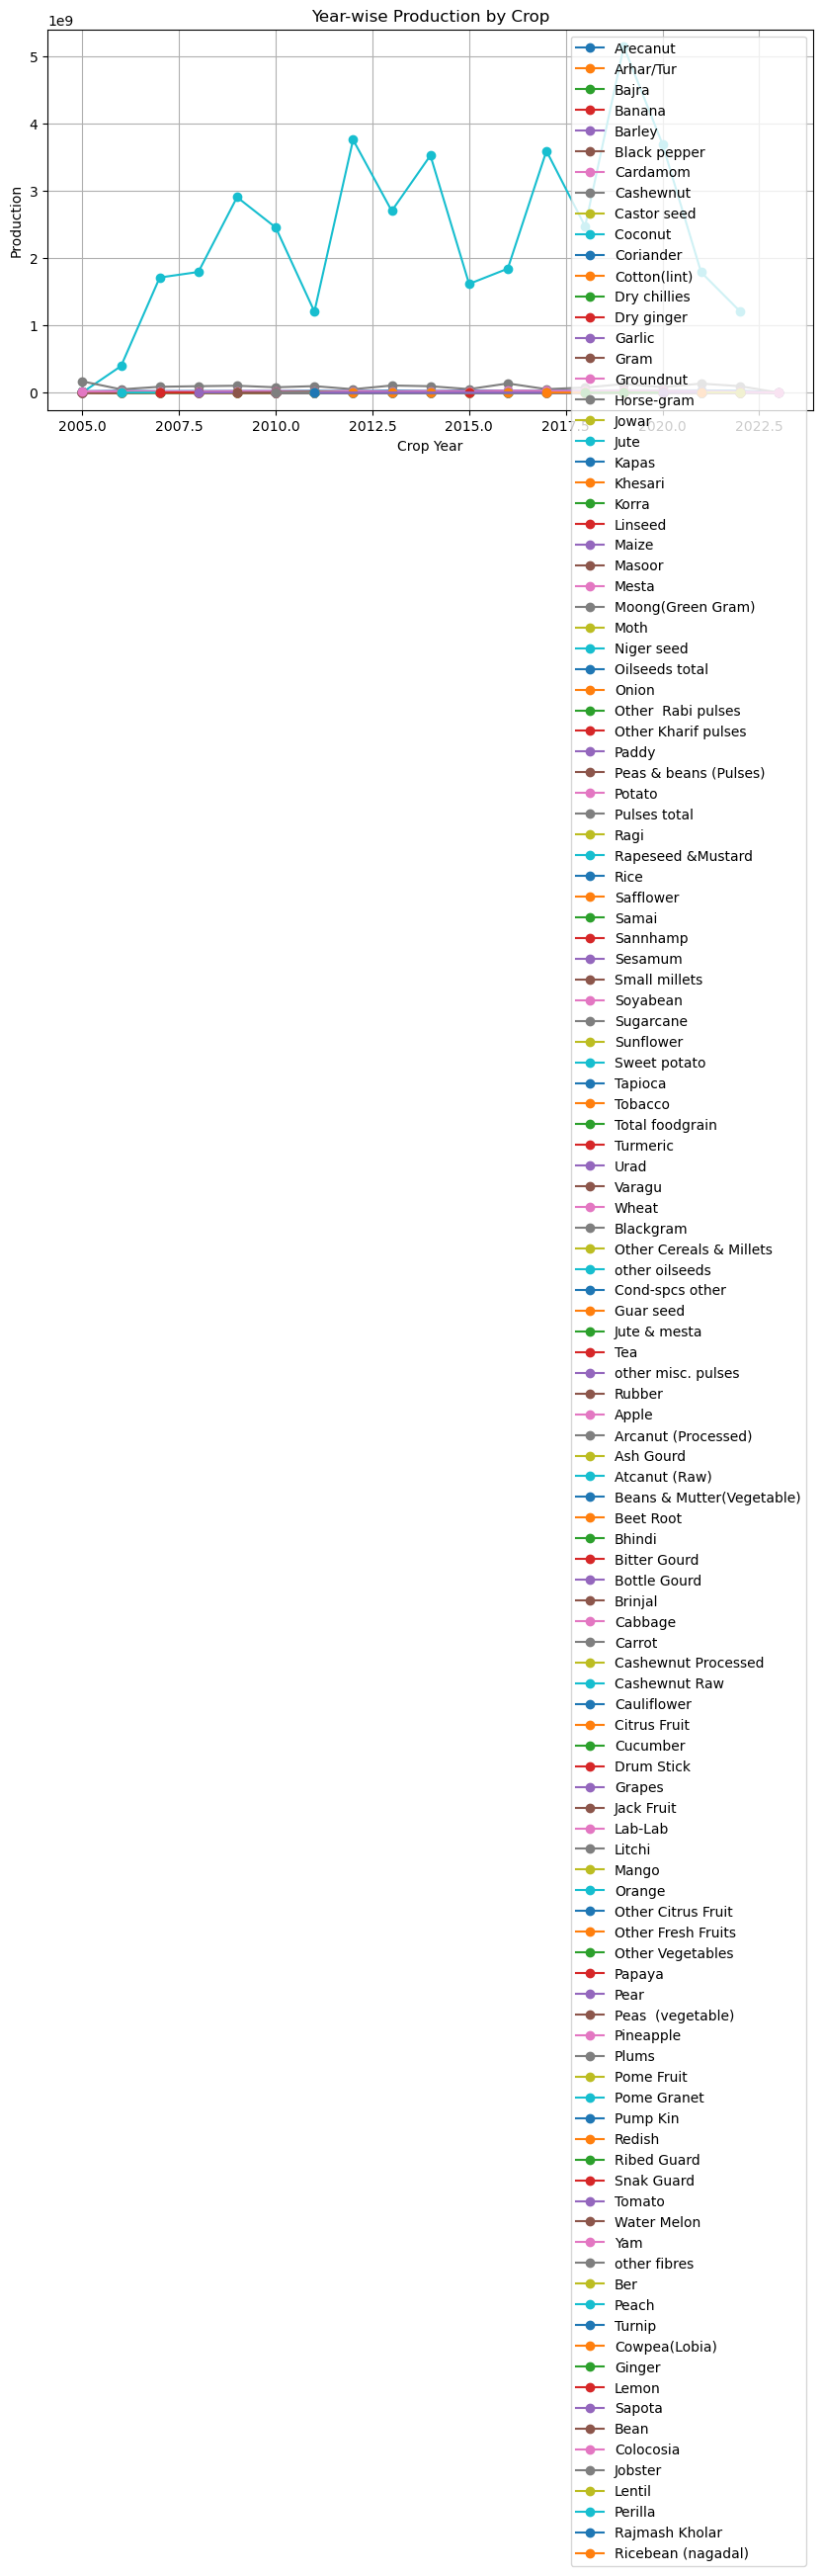

In [20]:
df['Crop_Year'] = pd.to_numeric(df['Crop_Year'], errors='coerce')
yearly_production = df.groupby(['Crop_Year', 'Crop'])['Production'].sum().reset_index()
plt.figure(figsize=(10, 5))
for crop in yearly_production['Crop'].unique():
    crop_data = yearly_production[yearly_production['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Production'], marker='o', linestyle='-', label=crop)
plt.xlabel("Crop Year"), plt.ylabel("Production"), plt.title("Year-wise Production by Crop")
plt.grid(True), plt.legend()
plt.show()



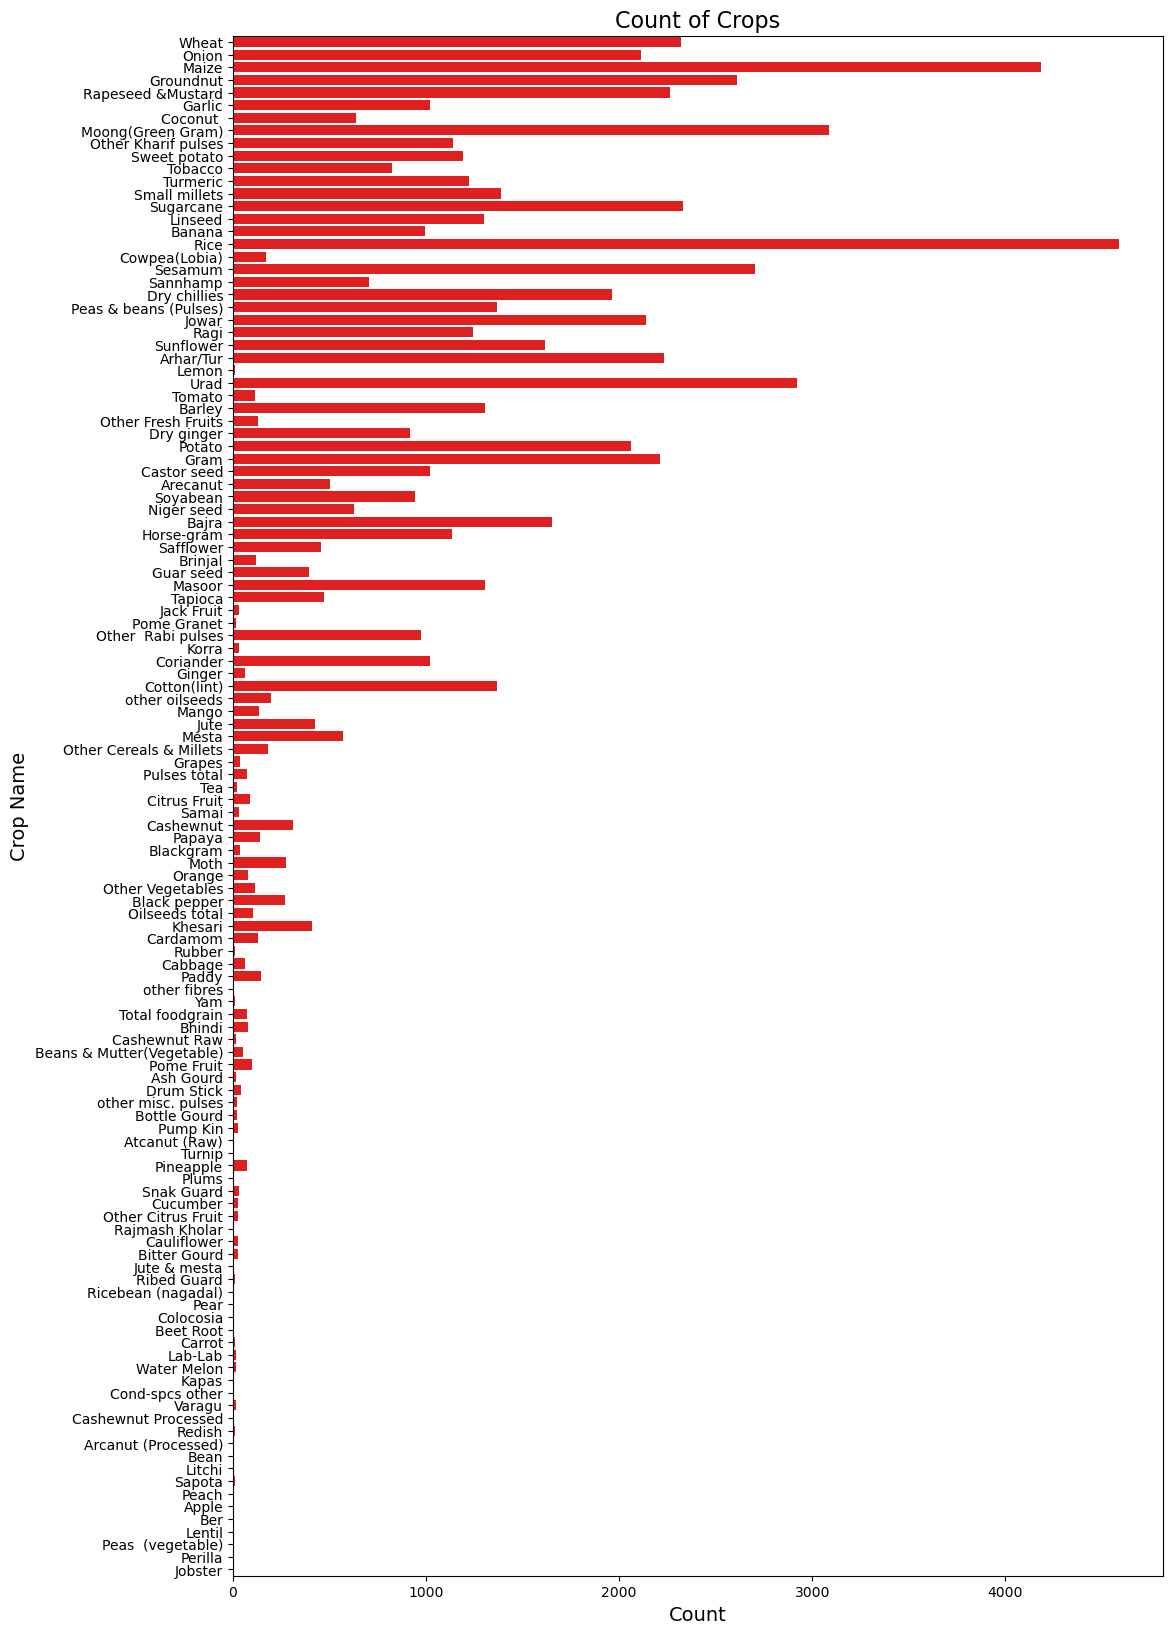

In [21]:

fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y='Crop', data=df, ax=ax, color='red')
sns.countplot(y='Crop', data=df, ax=ax, color='red')
plt.title('Count of Crops', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Crop Name', fontsize=14)
plt.show()



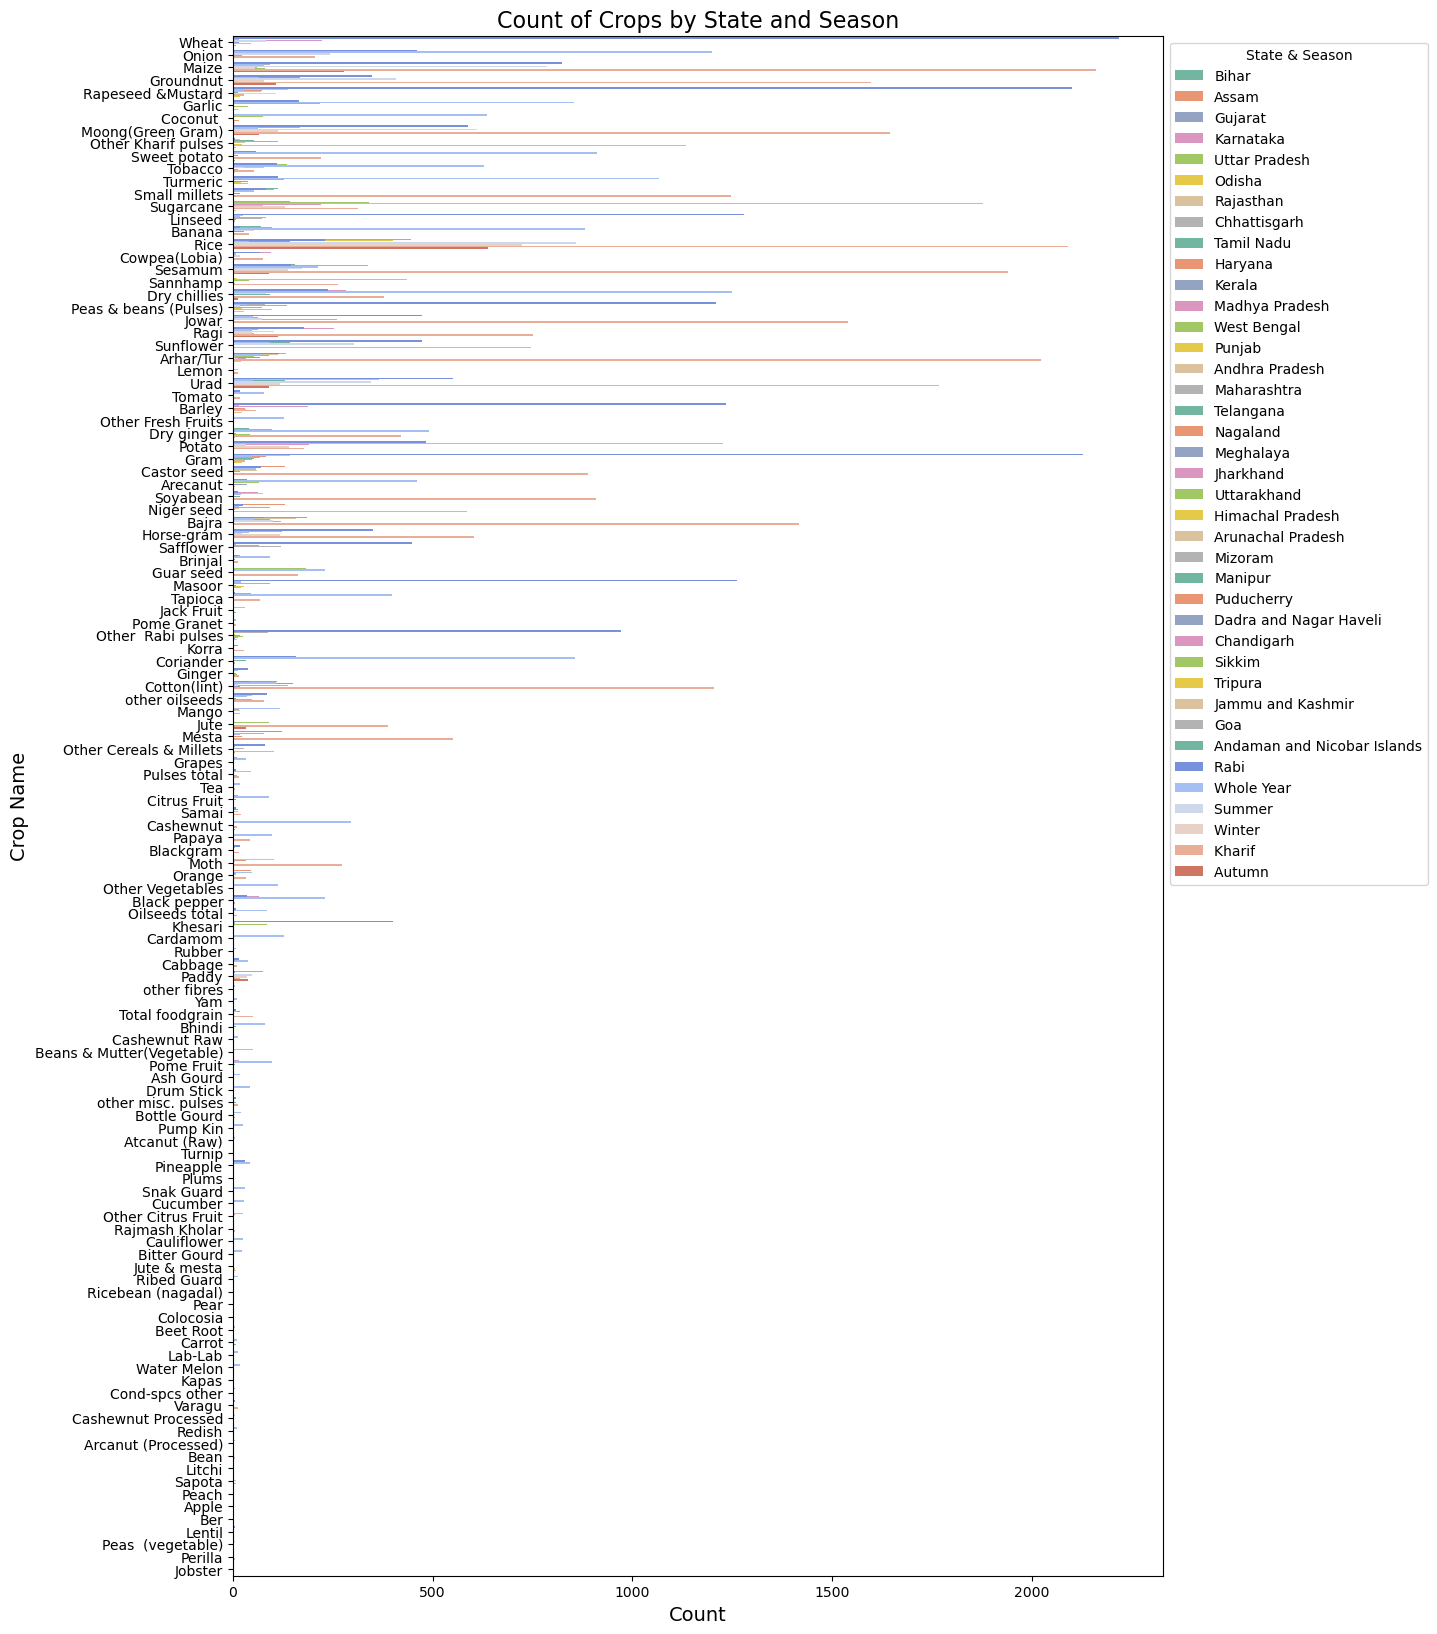

In [22]:
fig, ax = plt.subplots(figsize=(12, 20))
sns.countplot(y='Crop', hue='State_Name', data=df, ax=ax, palette='Set2')
sns.countplot(y='Crop', hue='Season', data=df, ax=ax, palette='coolwarm')
plt.title('Count of Crops by State and Season', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Crop Name', fontsize=14)
plt.legend(title="State & Season", bbox_to_anchor=(1, 1))
plt.show()


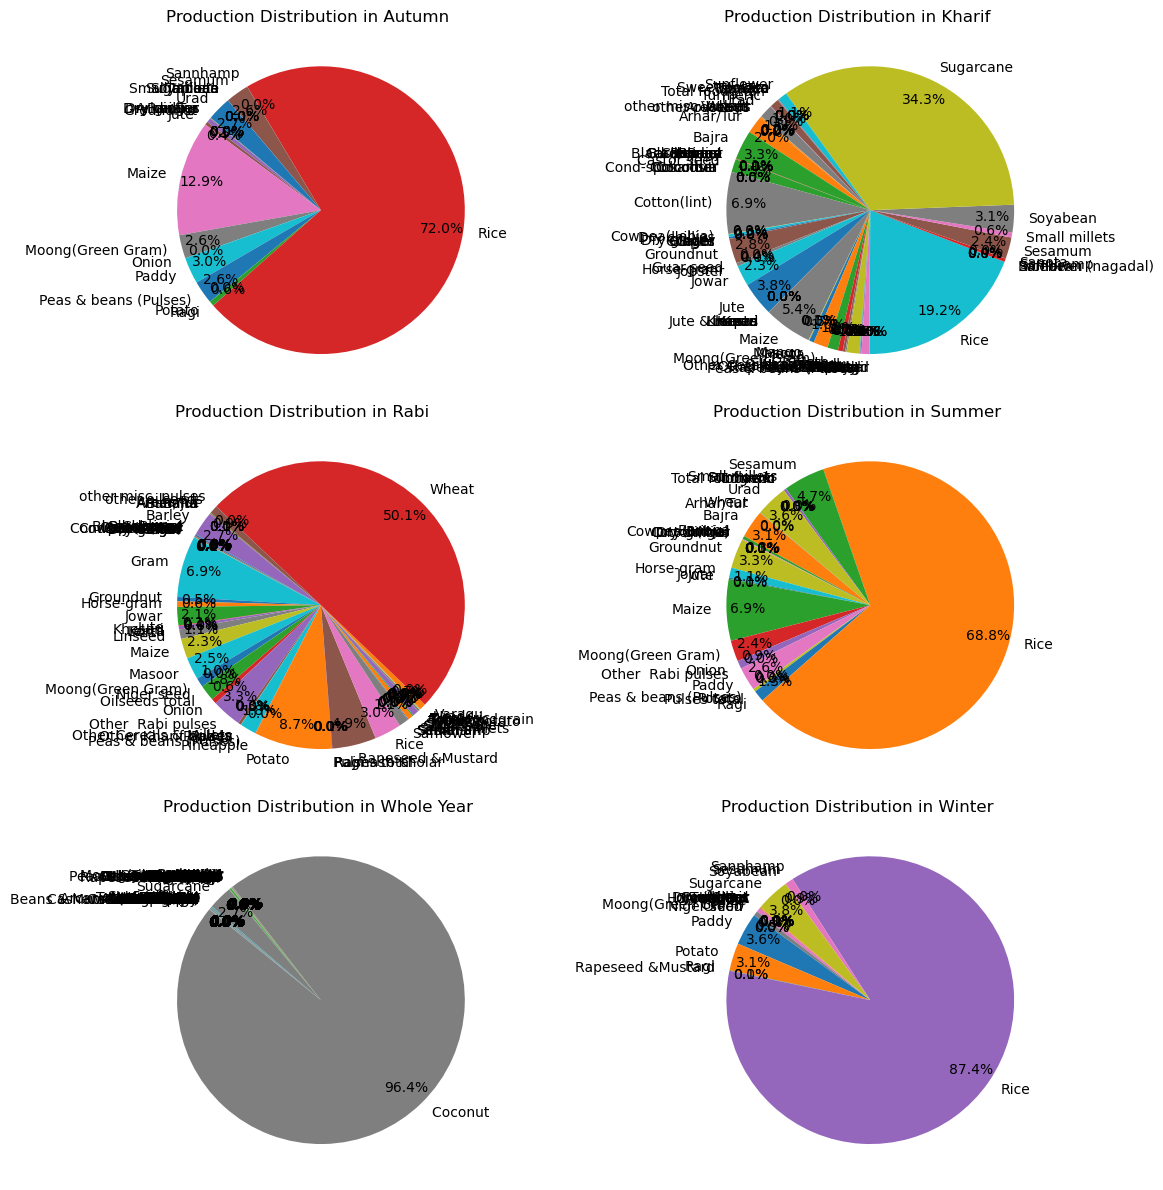

In [23]:
season_crop_analysis = df.groupby(['Season', 'Crop'])['Production'].sum().reset_index()
seasons = season_crop_analysis['Season'].unique()
num_seasons = len(seasons)
rows = (num_seasons // 2) + (num_seasons % 2)  
cols = 2
plt.figure(figsize=(12, rows * 4))
for i, season in enumerate(seasons, 1):
    plt.subplot(rows, cols, i)  
    season_data = season_crop_analysis[season_crop_analysis['Season'] == season]
    plt.pie(season_data['Production'], labels=season_data['Crop'], autopct='%1.1f%%', startangle=140, pctdistance=0.85)
    plt.title(f"Production Distribution in {season}")
plt.tight_layout()
plt.show()



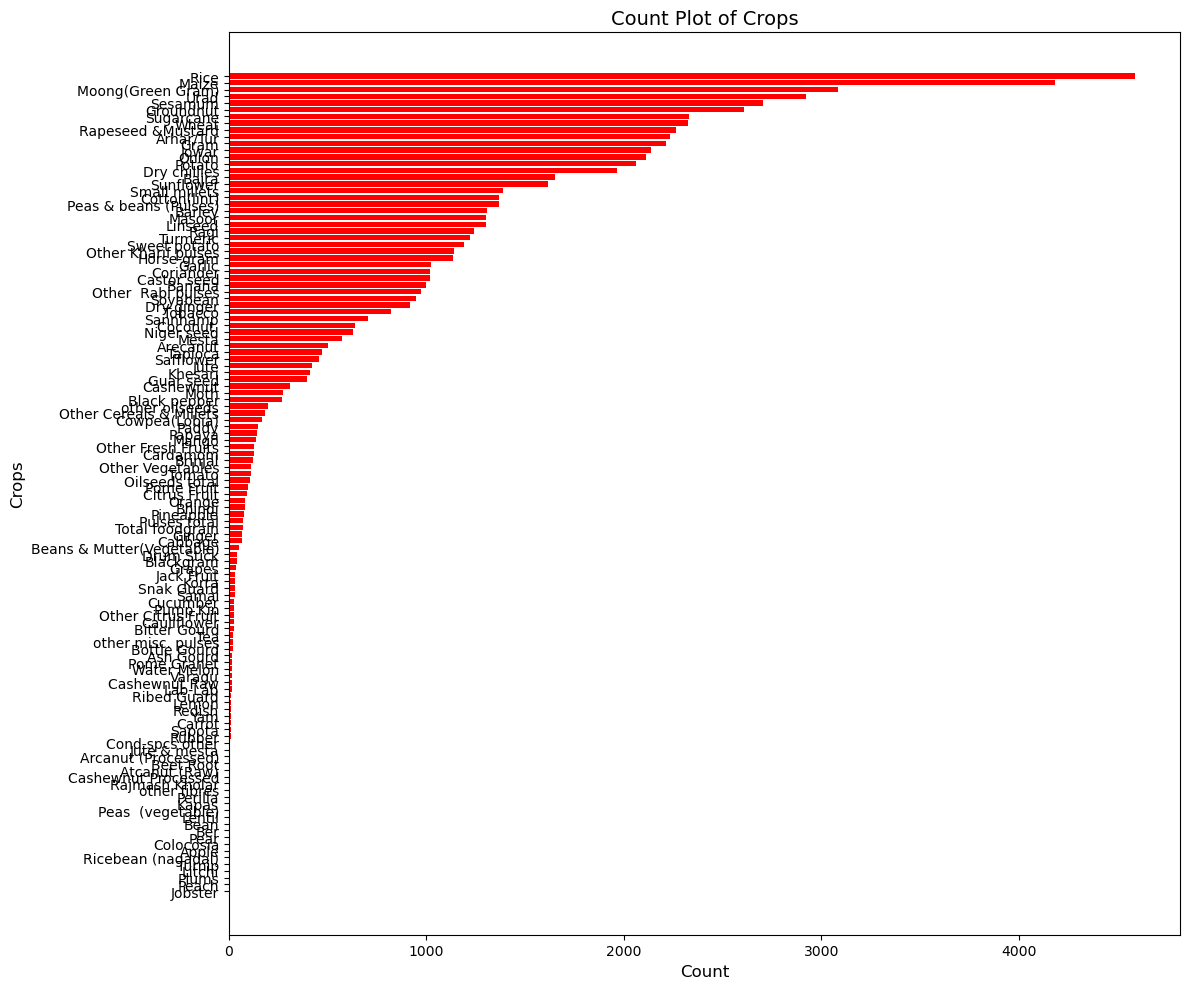

In [39]:
quality_counts = df['Crop'].value_counts().sort_values() 
plt.figure(figsize=(12, 10))
plt.barh(quality_counts.index, quality_counts, color='red')  
plt.title('Count Plot of Crops', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Crops', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


